In [1]:
# @author: Sujith
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_excel('Cryotherapy.xlsx')

In [3]:
# Visualizing the first 5 rows
print(dataset.head())

   sex  age   Time  Number_of_Warts  Type  Area  Result_of_Treatment
0    1   35  12.00                5     1   100                    0
1    1   29   7.00                5     1    96                    1
2    1   50   8.00                1     3   132                    0
3    1   32  11.75                7     3   750                    0
4    1   67   9.25                1     1    42                    0


In [4]:
# Description of the dataset
print(dataset.describe())

             sex        age       Time  Number_of_Warts       Type  \
count  90.000000  90.000000  90.000000        90.000000  90.000000   
mean    1.477778  28.600000   7.666667         5.511111   1.700000   
std     0.502304  13.360852   3.406661         3.567155   0.905042   
min     1.000000  15.000000   0.250000         1.000000   1.000000   
25%     1.000000  18.000000   4.562500         2.000000   1.000000   
50%     1.000000  25.500000   8.500000         5.000000   1.000000   
75%     2.000000  35.000000  10.687500         8.000000   3.000000   
max     2.000000  67.000000  12.000000        12.000000   3.000000   

             Area  Result_of_Treatment  
count   90.000000            90.000000  
mean    85.833333             0.533333  
std    131.733153             0.501683  
min      4.000000             0.000000  
25%     20.000000             0.000000  
50%     70.000000             1.000000  
75%    100.000000             1.000000  
max    750.000000             1.000000  


In [4]:
# Split the dataset into matrix of features and dependent vector
X = dataset.iloc[:, 0:6].values
y = dataset.iloc[:, 6].values

In [5]:
# OneHotEncoding the features
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0,4])
X = onehotencoder.fit_transform(X).toarray()

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

D:\Anaconda\envs\suju\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Applying PCA to the dataset
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variance=pca.explained_variance_ratio_

In [10]:
# Classifier of Logregression
from sklearn.svm import SVC 
classifier = SVC(kernel='rbf',C=10,gamma=0.4)
classifier.fit(X_train,y_train)   

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# Predicting the Test Set Results
y_pred=classifier.predict(X_test)

In [12]:
# Predicting the Test Set Results
y_pred=classifier.predict(X_test)

In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 6  1]
 [ 1 10]]


In [31]:
# K fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracies.mean()
accuracies.std()

0.08706768811060261

In [39]:
# Improving Model Performance using Grid search to choose the right set of hyperparameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           )
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Accuracy of :",best_accuracy*100)
print("Best set of parameters :", best_parameters)

Accuracy of : 87.5
Best set of parameters : {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}


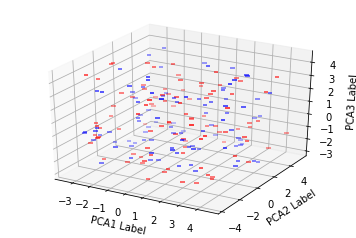

In [34]:
# Visualization(Reffered stackoverflow)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
X_set, y_set = X_train, y_train
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for i, j in enumerate(np.unique(y_set)):
    xs = randrange(n, X_set[:, 0].min() - 1, X_set[:, 0].max() + 1)
    ys = randrange(n,X_set[:, 1].min() - 1, X_set[:, 1].max() + 1)
    zs = randrange(n, X_set[:, 2].min() - 1, X_set[:, 2].max() + 1)
    ax.scatter(xs, ys, zs, c=ListedColormap(('red', 'blue'))(i), marker=j)

ax.set_xlabel('PCA1 Label')
ax.set_ylabel('PCA2 Label')
ax.set_zlabel('PCA3 Label')

plt.show()